# Linear Equations

In [148]:
# for QR codes use inline
%matplotlib inline
qr_setting = 'url'
#
# for lecture use notebook
# %matplotlib notebook
# qr_setting = None
#
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
reload(sl)
reload(ut);

>Traditionally, algebra was the art of solving equations and systems of equations.  The word _algebra_ comes form the Arabic _al-jabr_ which means _restoration_ (of broken parts).   The term was first used in a mathematical sense by Mohammed al-Khowarizmi (c. 780-850) who worked at the House of Wisdom, an academy established by Caliph al Ma'mum in Baghdad.   Linear algebra, then, is the art of solving systems of linear equations.

_Linear Algebra with Applications_ , Bretscher

Al-Khowarizmi gave his name to the _algorithm_.  The central problem of linear algebra is the solution of linear equations.

> The yield of one bundle of inferior rice, two bundles of medium grade rice, and three bundles of superior rice is 39 _dou_ of grain.  The yield of one bundle of inferior rice, three bundles of medium grade rice, and two bundles of superior rice is 34 _dou_.  The yield of three bundles of inferior rice, two bundles of medium grain rice, and one bundle of superior rice is 26 _dou_.  What is the yield of one bundle of each grade of rice?

_Nine Chapters on the Mathematical Art_ , c 200 BCE, China

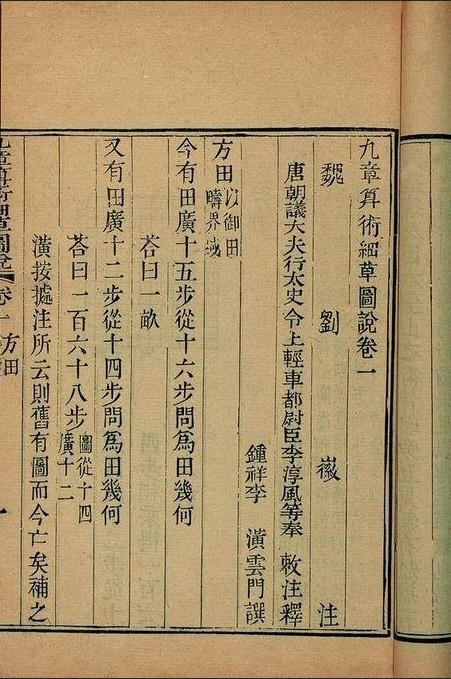

In [150]:
# image credit: http://en.wikipedia.org/wiki/The_Nine_Chapters_on_the_Mathematical_Art
# sl.hide_code_in_slideshow()
display(Image("images/nine-chapters-mathematical-art.jpg",width=300))

In [151]:
sl.hide_code_in_slideshow()
HTML(u'<a href="http://commons.wikimedia.org/wiki/File:%E4%B9%9D%E7%AB%A0%E7%AE%97%E8%A1%93%E7%B4%B0%E8%8D%89%E5%9C%96%E8%AA%AA.jpg#/media/File:%E4%B9%9D%E7%AB%A0%E7%AE%97%E8%A1%93%E7%B4%B0%E8%8D%89%E5%9C%96%E8%AA%AA.jpg">九章算術細草圖說</a> by 中國書店海王邨公司 - <a rel="nofollow" class="external free" href="http://pmgs.kongfz.com/detail/1_158470/">http://pmgs.kongfz.com/detail/1_158470/</a>. Licensed under Public Domain via <a href="//commons.wikimedia.org/wiki/">Wikimedia Commons</a>.')

Let's denote the unknown quantities as $x_1$, $x_2$, and $x_3$.  These are the yields of one bundle of inferior, medium grade, and superior rice, respectively.  We can then write the problem as:

\begin{eqnarray*}
x_1 + 2 x_2 + 3 x_3 &=& 39\\
x_1 + 3 x_2 + 2 x_3 &=& 34\\
3 x_1 + 2 x_2 + x_3 &=& 26
\end{eqnarray*}

The problem then is to determine the values of $x_1, x_2,$ and $x_3$.

These are _linear_ equations.  No term has power other than 1.  

For example, there are no terms involving $x_1^2$, or $x_1x_2$, or $\sqrt{x_3}$.

## Basic Definitions

* A _linear equation_ in the variables $x_1, \dots, x_n$ is an equation that can be written in the form $$a_1 x_1 + a_2 x_2 + \dots + a_n x_n = b$$ where $b$ and the coefficients $a_1, \dots, a_n$ are real or complex numbers that are usually known in advance.
* A _system of linear equations_ (or _linear system_ ) is a collection of one or more linear equations involving the same variables - say $x_1, \dots, x_n$.


* A _solution_ of the system is a list of numbers $(s_1, s_2, \dots, s_n)$ that makes each equation a true statement when the values $s_1, s_2, \dots, s_n$ are substituted for $x_1, x_2, \dots, x_n,$ respectively.

* The set of all possible solutions is called the _solution set_ of the linear system. 

* Two linear systems are called _equivalent_ if they have the same solution set. 


* A system of linear equations has
    1. no solution, or
    2. exactly one solution, or
    3. infinitely many solutions.
    

* A system of linear equations is said to be _consistent_ if it has either one solution or infinitely many solutions.
* A system of linear equations is said to be _inconsistent_ if it has no solution.

## The Geometry of Linear Equations

Any list of numbers $(s_1, s_2, \dots, s_n)$ can be thought of as a point in $n$-dimensional space, called a _vector space_.

We call that vector space $\mathbb{R}^n$.

So if we are considering linear equations with $n$ unknowns, the solutions are points in $\mathbb{R}^n$.

Now, any linear equation defines a point set with dimension one less than the space.  For example:

* if we are in 2-space (2 unknowns), a linear equation defines a line.
* if we are in 3-space (3 unknowns), a linear equation defines a plane.
* in higher dimensions, we refer to all such sets as _hyperplanes._

Question: why does a linear equation define a point-set of dimension one less than the space?

## Some Examples in $\mathbb{R}^2$

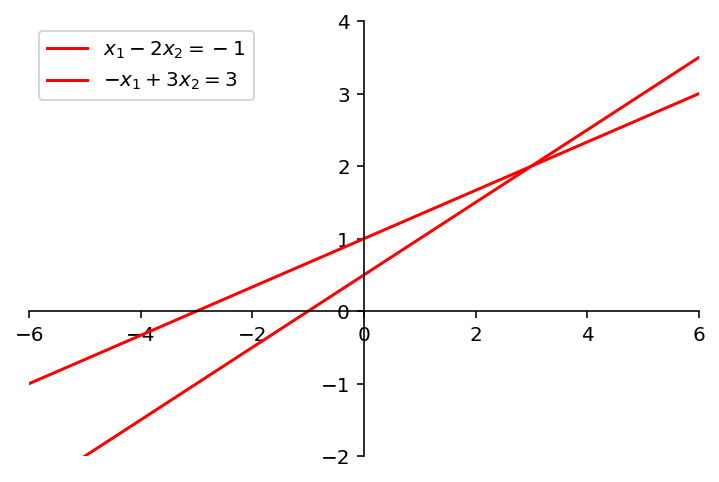

In [152]:
fig = ut.two_d_figure('Figure 1.1')
fig.centerAxes()
fig.plotLinEqn(1, -2, -1)
fig.plotLinEqn(-1, 3, 3)
plt.legend(loc='best')
print('')

This system of two equations has __exactly one__ solution.

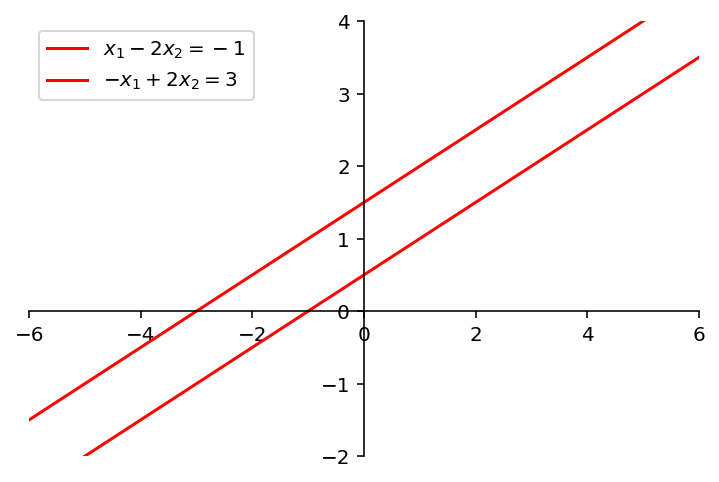

In [153]:
fig = ut.two_d_figure('Figure 1.2')
fig.centerAxes()
fig.plotLinEqn(1, -2, -1)
fig.plotLinEqn(-1, 2, 3)
plt.legend(loc='best')
print('')

This system of two equations has __no__ solutions.

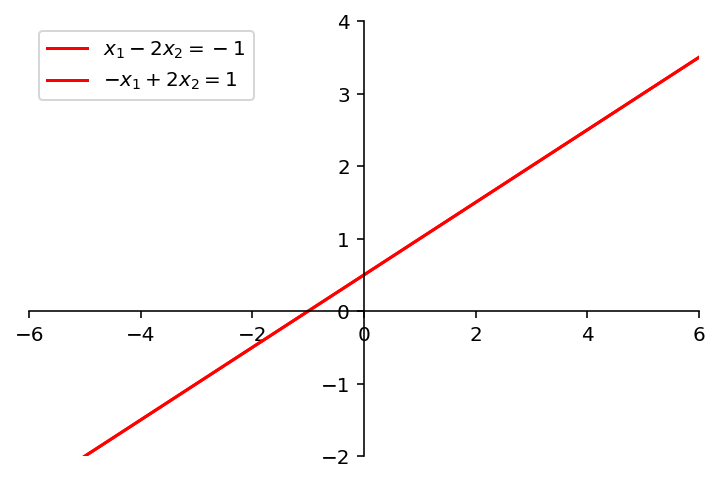

In [154]:
fig = ut.two_d_figure('Figure 1.3')
fig.centerAxes()
fig.plotLinEqn(1, -2, -1)
fig.plotLinEqn(-1, 2, 1)
plt.legend(loc='best')
print('')

This system of equations has __infinitely many__ solutions.

## Some Examples in $\mathbb{R}^3$

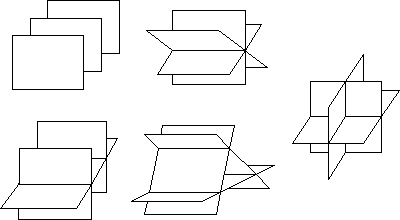

In [155]:
display(Image("images/Pic_3-planes.png"))

How many solutions are there in each of these cases?

## The Matrices of a System

The essential information of a linear system can be recorded compactly in a rectangular array called a __matrix.__
For the following system of equations, 
$$
\begin{array}{rcr}
    x_1 - 2x_2 +x_3 &=& 5\\
    2x_2 - 8x_3 &=& -4\\
    6x_1 +5x_2 +9x_3 &=& -4
\end{array}
$$                  

                                          
the matrix                             

$$\mat{{rrr}
    1  & -2  & 1 \\
    0 & 2 &  - 8 \\
    6 & 5 &9 
}$$

is called the _coefficient matrix_ of the system.
    

An __augmented matrix__ of a system consists of the coefficient matrix with an added column containing the constants from the right sides of the equations.

For the same system of equations,
$$
\begin{array}{rcr}
    x_1 - 2x_2 +x_3 &=& 5\\
    2x_2 - 8x_3 &=& -4\\
    6x_1 +5x_2 +9x_3 &=& -4
\end{array}
$$                     

                                       
the matrix                             

$$\mat{{rrrr}
    1  & -2  & 1 & 5\\
    0 & 2 &  - 8 & -4\\
    6 & 5 &9 & -4
}$$

is called the _augmented matrix_ of the system.   

A matrix with $m$ rows and $n$ columns is referred to as ''an $m \times n$ matrix'' and is an element of the set $\mathbb{R}^{m\times n}.$  

(Note that we always list the number of rows first, then the number of columns.)

## Solving Linear Systems

To solve a linear system, we transform it into a _new_ system which is equivalent to the old system, meaning it has the same solution set.   However the new system is easier to solve.

We can make these transformations because of three facts.

__Fact Number 1:__ Given a set of linear equations, we can __add one equation to another__ without changing the solution set. 

By definition, any solution of the old system makes each old equation true;  therefore any solution of the old system makes each new equation true.

Example:
$$ 
\begin{array}{rcr}
3x_1 + 2x_2 &=& -3\\
-x_1 + 4x_2 &=& 2\\
\end{array}
$$ 
has the same solution set as:
$$ 
\begin{array}{rcr}
3x_1 + 2x_2 &=& -3\\
2x_1 + 6x_2 &=& -1\\
\end{array}
$$



__Fact Number 2:__ Another, more obvious fact is that we can __multiply any equation by a constant__ without changing its meaning (and therefore the solution set).

Example: 
$$ 
3x = 2
$$
has the same solution set as:
$$
9x = 6
$$

__Fact Number 3:__ And an even more obvious fact is that we can __change the order__ of the equations without changing anything.

Together, these three rules form a set of tools we can use to solve linear systems.   Here is an example.

### Step 1: Elimination

The process we'll describe consists of two steps: _Elimination_ and _Backsubstitution._ 

The goal of elimination is to eliminate terms to create a _triangular_ matrix (or system).  The basic operation we will repeatedly apply is to __add a multiple of one equation (row) to another.__  We'll do this with the equations and the matrix side-by-side. 

Here is the original system:

$$\begin{array}{cc}
\begin{array}{rcr}
    x_1 - 2x_2 +x_3 &=& 5\\
    2x_2 - 8x_3 &=& -4\\
    6x_1 +5x_2 +9x_3 &=& -4
\end{array}
& 
\;\;\;\;\;\;\mat{{rrrr}
    1  & -2  & 1 & 5\\
    0 & 2 &  - 8 & -4\\
    6 & 5 &9 & -4
}\\
\end{array}$$

The first stage of the process is called _elimination_.  To begin: we add -6 times the first equation to the third equation:

$$
\begin{array}{rrrrrr}
    &6x_1& +5x_2& +9x_3& =& -4\\
 +  &-6x_1& +12x_2& -6x_3& =& -30\\
 \hline
   & &      17x_2& +3x_3 &=& -34\\
\end{array}
$$

This gives us a new system.

$$\begin{array}{cr}
\begin{array}{rcr}
    x_1 - 2x_2 +x_3 &=& 5\\
    2x_2 - 8x_3 &=& -4\\
     17x_2 +3x_3 &=& -34
\end{array}
&
\;\;\;\;\;\;\mat{{rrrr}
    1  & -2  & 1 & 5\\
    0 & 2 &  - 8 & -4\\
    0 & 17 & 3 & -34
}\\
\end{array}
$$

Note that this is not the _same_ system of equations, but it is _equivalent_ -- it has the same solution set.

Next, we multiply the second equation by $1/2$ to get its leading coefficient to be 1:

$$\begin{array}{cr}
\begin{array}{rcr}
    x_1 - 2x_2 +x_3 &=& 5\\
    x_2 - 4x_3 &=& -2\\
     17x_2 +3x_3 &=& -34
\end{array}
&
\;\;\;\;\;\;\mat{{rrrr}
    1  & -2  & 1 & 5\\
    0 & 1 &  - 4 & -2\\
    0 & 17 & 3 & -34
}\\
\end{array}
$$

Next, we multiply the second equation by $-17$ and add it to the third equation:

$$\begin{array}{cr}
\begin{array}{rcr}
    x_1 - 2x_2 +x_3 &=& 5\\
    x_2 - 4x_3 &=& -2\\
         72x_3 &=& 0
\end{array}
&
\;\;\;\;\;\;\left[\begin{array}{rrrr}
    1  & -2  & 1 & 5\\
    0 & 1 &  - 4 & -2\\
    0 & 0 & 72 & 0
\end{array}
\right]\\
\end{array}
$$

And next we can divide the third equation by $72$ to get its leading coefficient equal to 1:

$$\begin{array}{cr}
\begin{array}{rcr}
    x_1 - 2x_2 +x_3 &=& 5\\
    x_2 - 4x_3 &=& -2\\
           x_3 &=& 0
\end{array}
&
\;\;\;\;\;\;\mat{{rrrr}
    1  & -2  & 1 & 5\\
    0 & 1 &  - 4 & -2\\
    0 & 0 &  1 & 0
}\\
\end{array}
$$

We have now put the system and matrix into _triangular_ form.  In a triangular matrix, all values below the diagonal are zero.

### Step 2: Backsubstitution

At this point, the process shifts to _backsubstitution_.  We now have the value for one variable, and we will substitute it into other equations to simplify them and get values for the other variables.

Although we think of its as a somewhat different stage, in reality it still comes down to applying the three rules.   

First, we substitute the value of $x_3$ into the equations above it.  This is actually multiplying equation 3 by the proper value and adding it to equations above it.

$$\begin{array}{cr}
\begin{array}{rcr}
    x_1 - 2x_2 &=& 5\\
    x_2  &=& -2\\
           x_3 &=& 0
\end{array}
&
\;\;\;\;\;\;\mat{{rrrr}
    1  & -2  & 0 & 5\\
    0 & 1 &  0 & -2\\
    0 & 0 &  1 & 0
}\\
\end{array}
$$

Next, we do the same thing with equation 2, substituting it into equation 1 above it:

$$\begin{array}{cr}
\begin{array}{rcr}
    x_1  &=& 1\\
    x_2  &=& -2\\
           x_3 &=& 0
\end{array}
&
\;\;\;\;\;\;\mat{{rrrr}
    1  & 0  & 0 & 1\\
    0 & 1 &  0 & -2\\
    0 & 0 &  1 & 0
}\\
\end{array}
$$

Now we can __read off the solution:__ it is $x_1 = 1$, $x_2 = -2$, $x_3 = 0$.   Notice the particular form of the resulting matrix: ones on the diagonal, zeros above and below each 1.

Let's get a sense of this process geometrically. 

Here are the three starting equations:

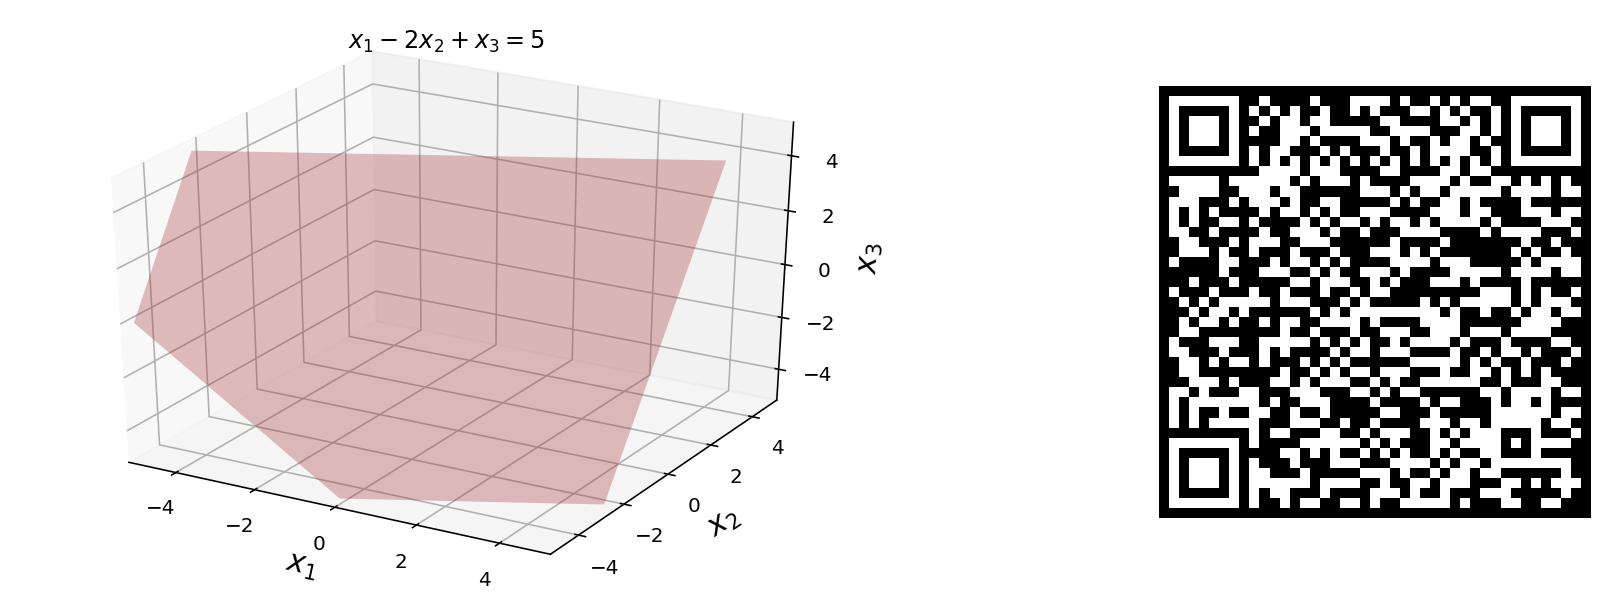

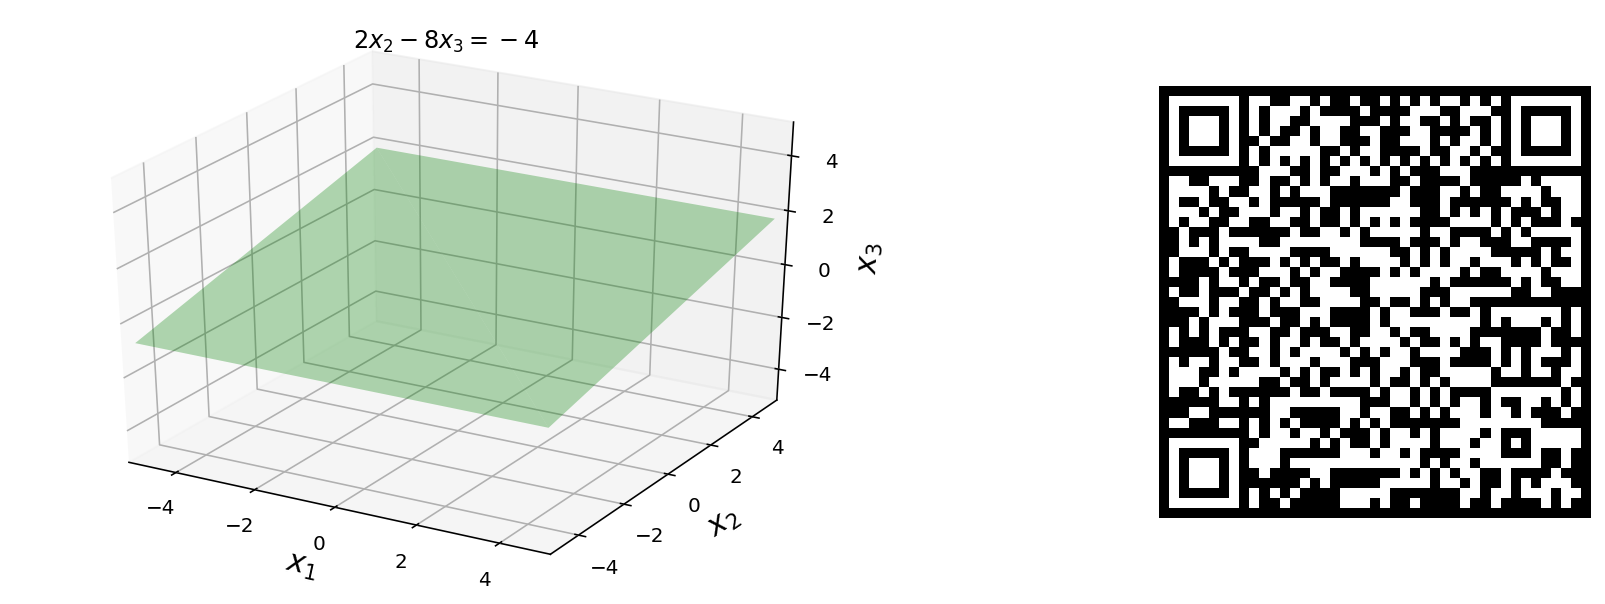

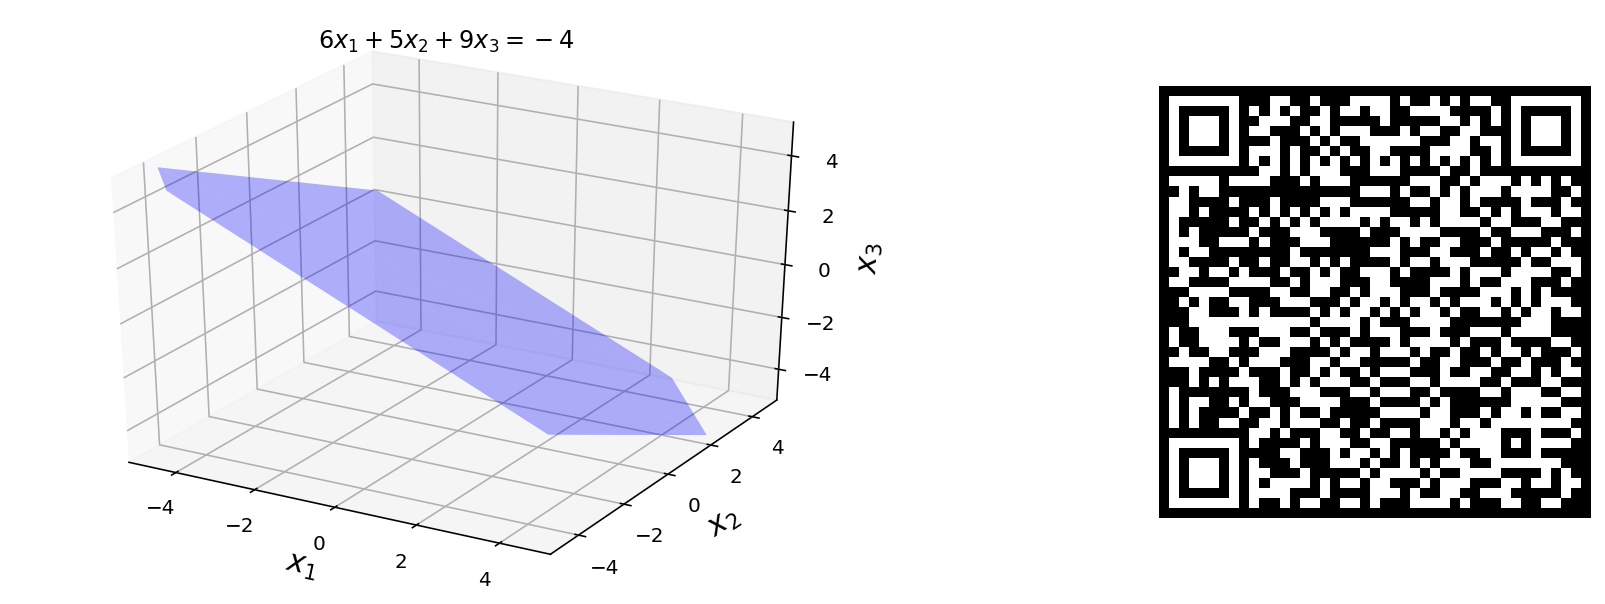

In [156]:
eq1 = [1, -2,  1,  5]
eq2 = [0,  2, -8, -4]
eq3 = [6,  5,  9, -4]

fig = ut.three_d_figure('Figure 1.1', fig_desc = format(ut.formatEqn(eq1[0:3], eq1[3])),
                        xmin = -5, xmax = 5, ymin = -5, ymax = 5, zmin = -5, zmax = 5, qr = qr_setting)
fig.plotLinEqn(eq1, 'Brown')
fig.ax.set_title('${}$'.format(ut.formatEqn(eq1[0:3], eq1[3])))
fig.save('Fig01.1')

fig = ut.three_d_figure('Figure 1.2', format(ut.formatEqn(eq2[0:3], eq2[3])),
                        xmin = -5, xmax = 5, ymin = -5, ymax = 5, zmin = -5, zmax = 5, qr = qr_setting)
fig.plotLinEqn(eq2, 'Green')
fig.ax.set_title('${}$'.format(ut.formatEqn(eq2[0:3], eq2[3])))
fig.save('Fig01.2')

fig = ut.three_d_figure('Figure 1.3', fig_desc = format(ut.formatEqn(eq3[0:3], eq3[3])),
                        xmin = -5, xmax = 5, ymin = -5, ymax = 5, zmin = -5, zmax = 5, qr = qr_setting)
fig.plotLinEqn(eq3, 'Blue')
fig.ax.set_title('${}$'.format(ut.formatEqn(eq3[0:3], eq3[3])))
fig.save('Fig01.3')


Now let's compare the starting point and the finishing point:

$$
\begin{array}{rcr}
    x_1 - 2x_2 +x_3 &=& 5\\
    2x_2 - 8x_3 &=& -4\\
    6x_1 +5x_2 +9x_3 &=& -4
\end{array}
\hspace{0.5in}
{\LARGE\rightarrow}
\hspace{0.5in}
\begin{array}{rcr}
    x_1  &=& 1\\
    x_2  &=& -2\\
           x_3 &=& 0
\end{array}
$$

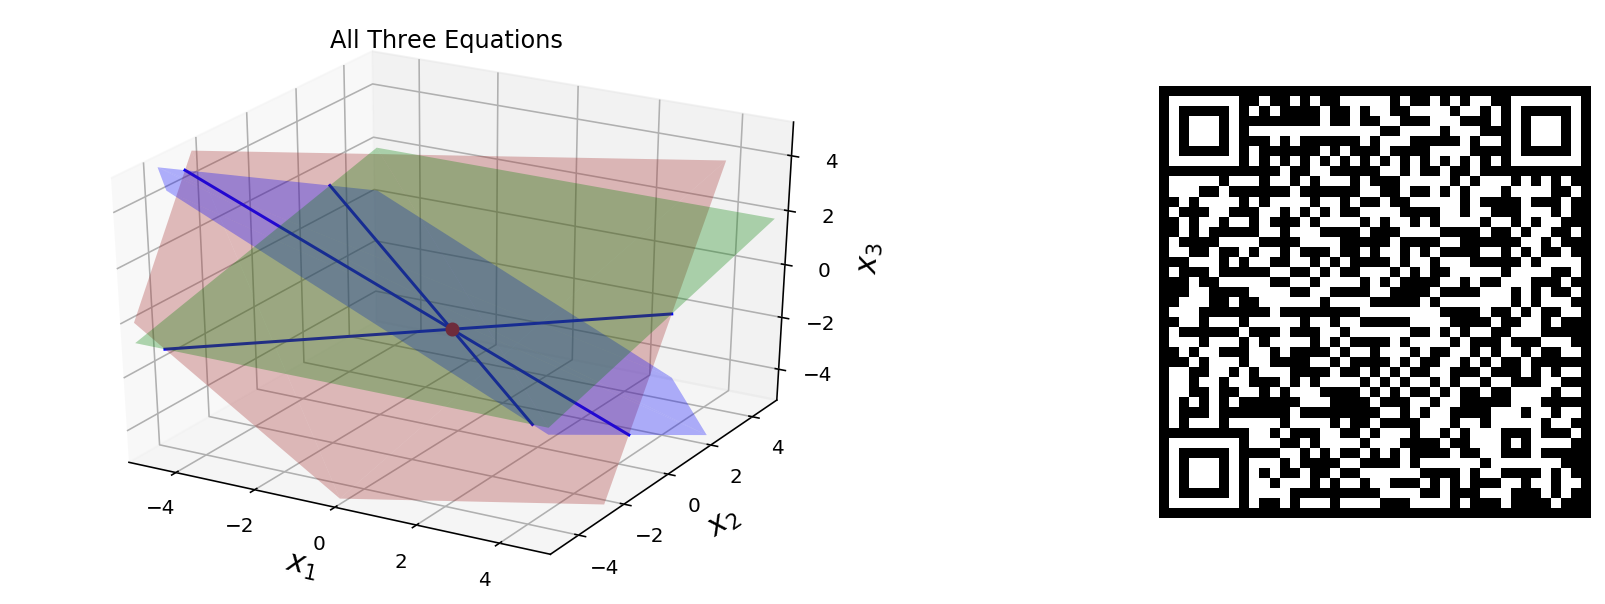

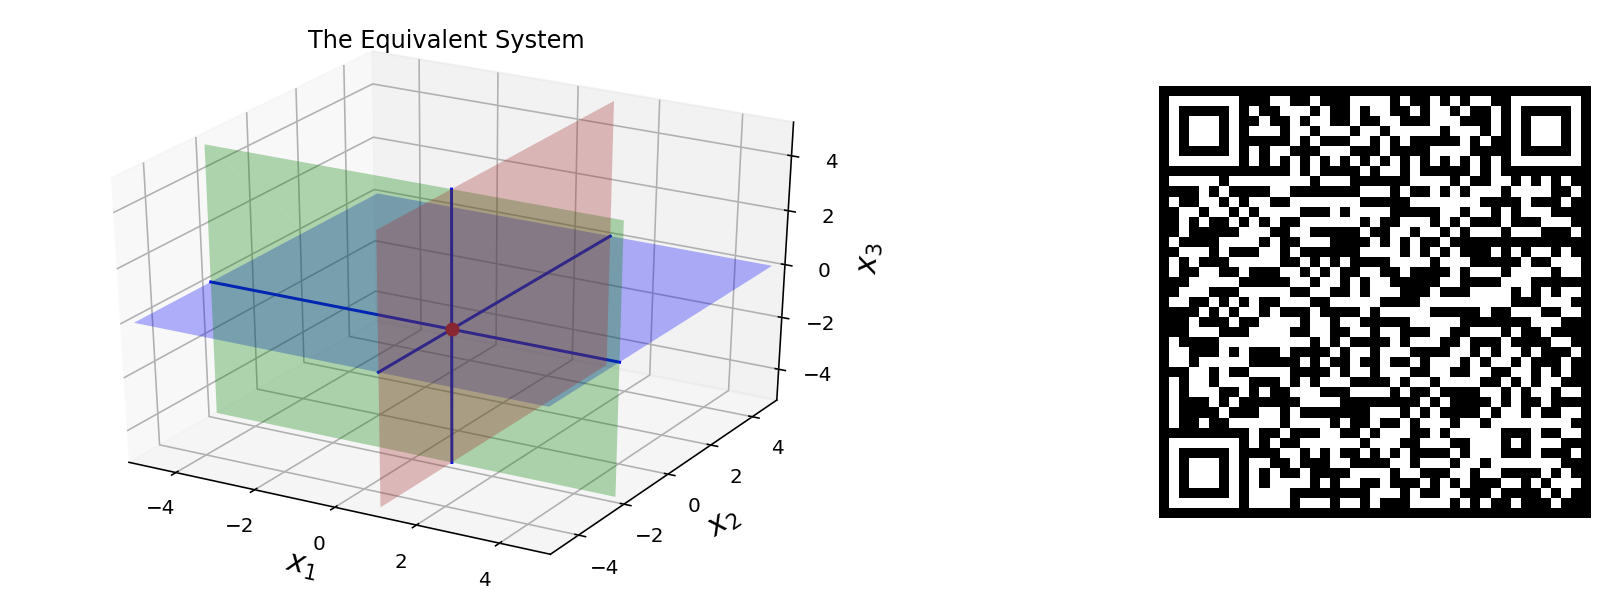

In [157]:
fig = ut.three_d_figure('Figure 1.4', fig_desc = 'All Three Equations',
                        xmin = -5, xmax = 5, ymin = -5, ymax = 5, zmin = -5, zmax = 5, qr = qr_setting)
eq1 = [1, -2,  1,  5]
eq2 = [0,  2, -8, -4]
eq3 = [6,  5,  9, -4]
fig.plotLinEqn(eq1, 'Brown')
fig.plotLinEqn(eq2, 'Green')
fig.plotLinEqn(eq3, 'Blue')
fig.plotIntersection(eq1, eq2, color='Blue')
fig.plotIntersection(eq2, eq3, color='Blue')
fig.plotIntersection(eq1, eq3, color='Blue')
fig.plotPoint(1, -2, 0)
fig.ax.set_title('All Three Equations')
fig.save('Fig01.4')

fig = ut.three_d_figure('Figure 1.5', fig_desc = 'The Equivalent System',
                        xmin = -5, xmax = 5, ymin = -5, ymax = 5, zmin = -5, zmax = 5, qr = qr_setting)
eq1 = [1, 0, 0,  1]
eq2 = [0, 1, 0, -2]
eq3 = [0, 0, 1,  0]
fig.plotLinEqn(eq1, 'Brown')
fig.plotLinEqn(eq2, 'Green')
fig.plotLinEqn(eq3, 'Blue')
fig.plotIntersection(eq1, eq2, color='Blue')
fig.plotIntersection(eq2, eq3, color='Blue')
fig.plotIntersection(eq1, eq3, color='Blue')
fig.plotPoint(1, -2, 0)
fig.ax.set_title('The Equivalent System')
fig.save('Fig01.5')

$$
\left[\begin{array}{rrrr}
    1  & -2  & 1 & 5\\
    0 & 2 &  - 8 & -4\\
    6 & 5 &9 & -4
\end{array}
\right]
\hspace{0.5in}
{\LARGE\rightarrow}
\hspace{0.5in}
\left[\begin{array}{rrrr}
    1  & 0  & 0 & 1\\
    0 & 1 &  0 & -2\\
    0 & 0 &  1 & 0
\end{array}
\right]
$$

Notice how all the planes have shifted, but __they still intersect in the same point.__   This is the _geometric_ interpretation of __equivalent__ systems.

## Verifying the Solution

* It's important that, once you have solved a system, you _verify_ the solution
* i.e., go back and confirm that what you have computed, in fact meets the original requirements.

So, in our case here is the original system and its solution:

$$
\begin{array}{rcr}
    x_1 - 2x_2 +x_3 &=& 5\\
    2x_2 - 8x_3 &=& -4\\
    6x_1 +5x_2 +9x_3 &=& -4
\end{array}
\hspace{0.5in}
{\LARGE\rightarrow}
\hspace{0.5in}
\begin{array}{rcr}
    x_1  &=& 1\\
    x_2  &=& -2\\
           x_3 &=& 0
\end{array}
$$

We can verify by substitution:

$$
\begin{array}{rcr}
    1 - 2(-2) + 0 &=& 5\\
    2(-2) - 8(0) &=& -4\\
    6(1) +5(-2) +9(0) &=& -4
\end{array}
$$

The solution $(1, -2, 0)$ makes each equation true.  __Confirmed!__

## Row Equivalence

OK, let's step back and formalize what we have done.

__Elementary Row Operations__ are the following:
1. (Replacement) Replace one row by the sum of itself and a multiple of another row.
2. (Interchange) Interchange two rows.
3. (Scaling) Multiply all entries in a row by a nonzero constant.

Two matrices are called __row equivalent__ if there is a sequence of elementary row operations that transforms one matrix into the other.

If the augmented matrices of two linear systems are row equivalent, then the two systems __have the same solution set.__

## Fundamental Questions

When presented with a linear system, we always need to ask two fundamental questions:


1. Is the system _consistent;_ that is, does at least one solution exist?
2. If a solution exists, is there only one; that is, is the solution _unique?_



These really are fundamental; we will see that the answers to these questions have far-reaching implications.


## Recognizing an Inconsistent System

Consider the following system:

$$
\begin{array}{rcr}
x_2 - 4x_3 &=& 8\\
2x_2 - 3x_2 + 2x_3 &=& 1\\
5x_1 - 8x_2 + 7x_3 &=& -20
\end{array}
$$

whose augmented matrix is:
$$
\left[\begin{array}{rrrr}
0&1&-4&8\\
2&-3&2&1\\
5&-8&2&-20
\end{array}\right]
$$

Let's apply our row reduction procedure to this matrix.

First, we'll interchange rows 1 and 2:

$$
\left[\begin{array}{rrrr}
2&-3&2&1\\
0&1&-4&8\\
5&-8&2&-20
\end{array}\right]
$$

Next, we'll eliminate the $5x_1$ term in the third equation by adding $-5/2$ times row 1 to row 3:

$$
\left[\begin{array}{rrrr}
2&-3&2&1\\
0&1&-4&8\\
0&-1/2&2&-45/2
\end{array}\right]
$$


Next, we use the $x_2$ term in the second equation to eliminate the $-(1/2)x_2$ term from the third equation (that is, add 1/2 times row 2 to row 3).

$$
\left[\begin{array}{rrrr}
2&-3&2&1\\
0&1&-4&8\\
0&0&0&-37/2
\end{array}\right]
$$

This matrix is now in triangular form:

$$
\left[\begin{array}{rrrr}
2&-3&2&1\\
0&1&-4&8\\
0&0&0&-37/2
\end{array}\right]
$$

What does it mean?  In particular, what does the last row say?

The last row stands for the equation:
$$ 0x_1 + 0x_2 + 0x_3 = -37/2.$$

Clearly, this equation has _no_ solution.  Now, we know that row reductions never change the solution set of a system.  So, the original set of equations also has _no_ solution.   It is __inconsistent.__

We can conclude that an inconsistent system will lead, by row reductions, to a system containing the equation $0 = k$ for some nonzero $k$.

## Geometric Interpretation of Inconsistency

Here are our original equations, as hyperplanes:

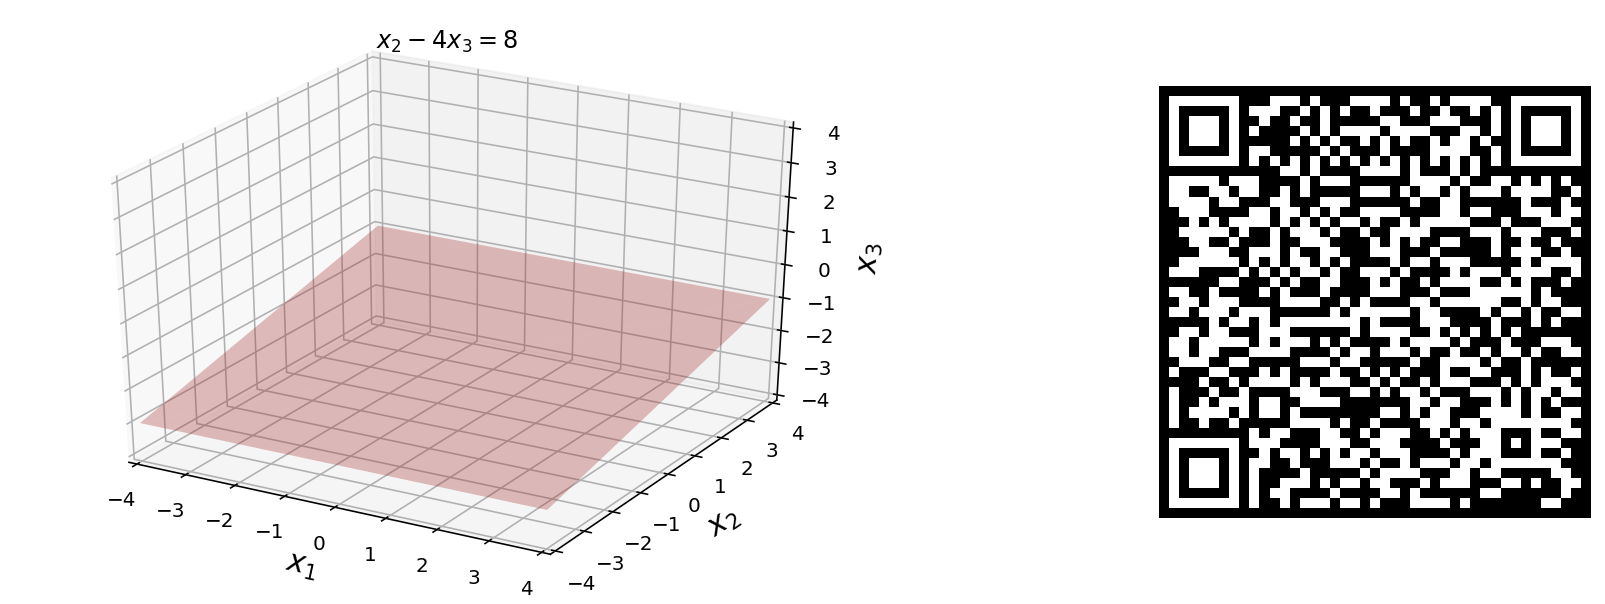

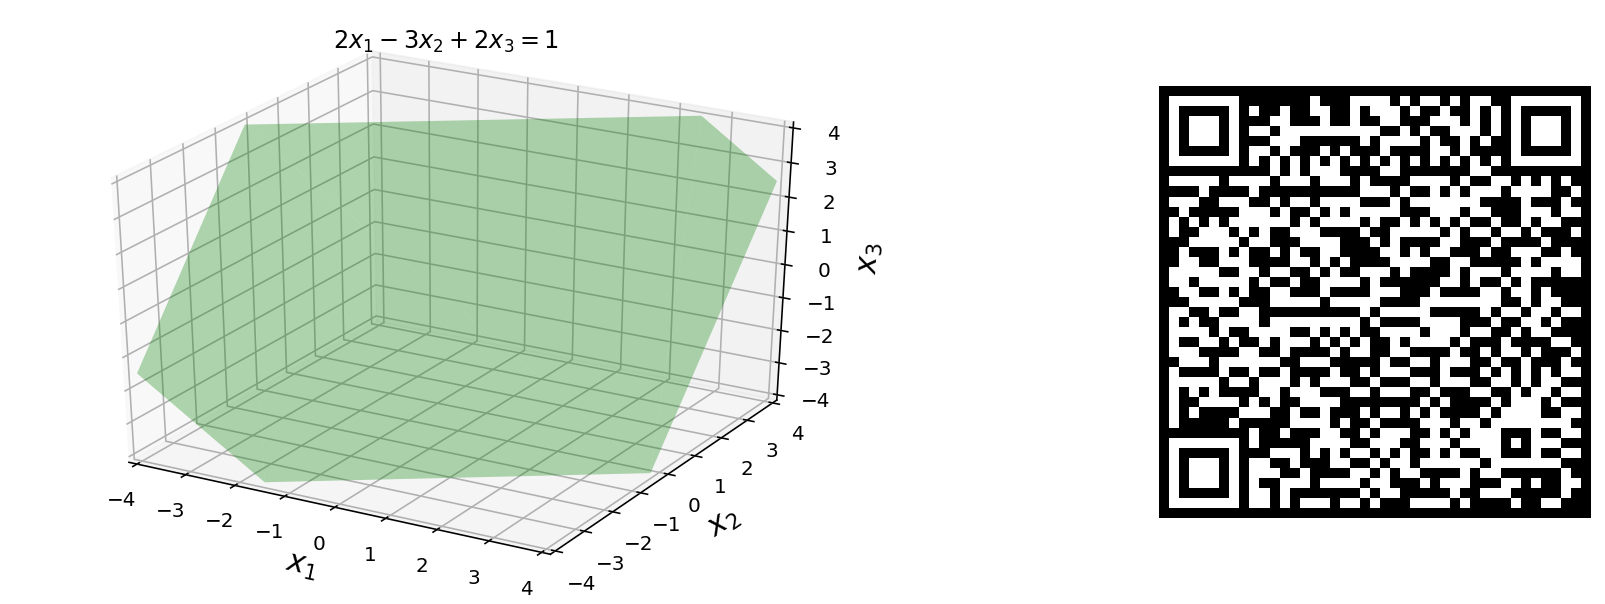

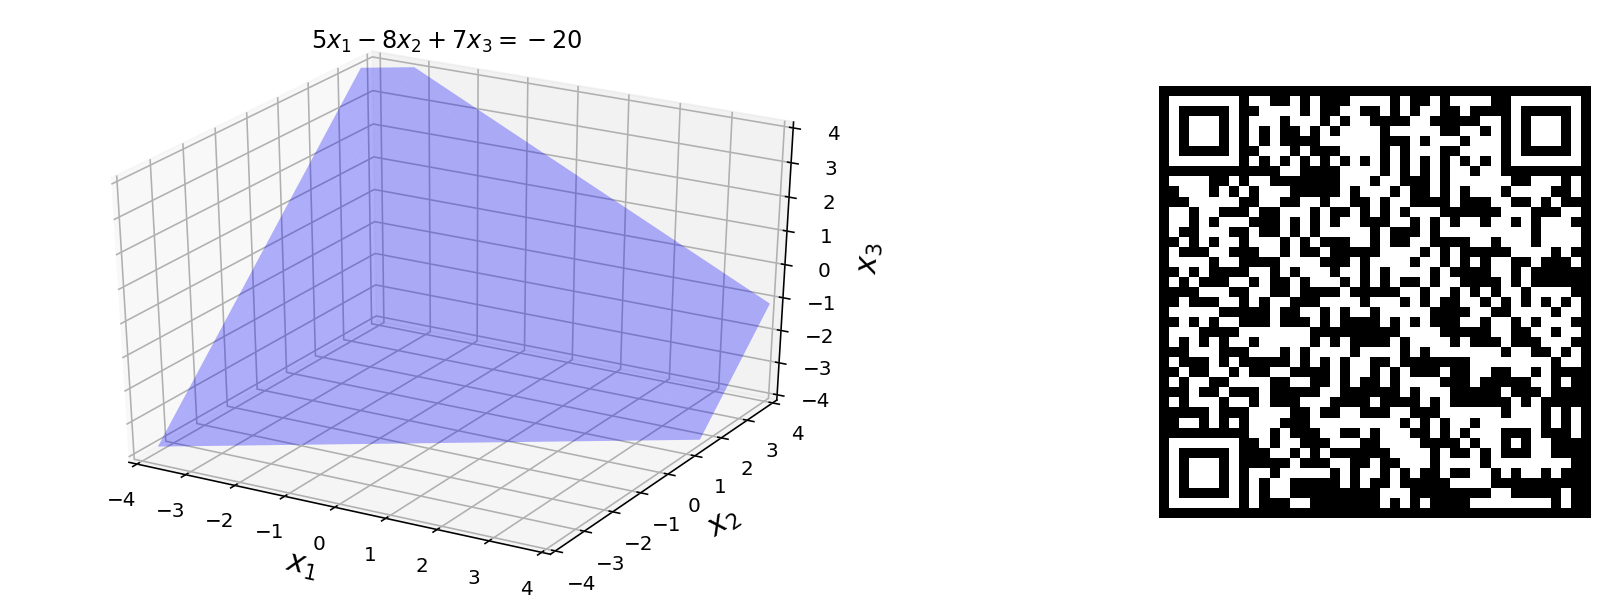

In [158]:
eq1 = [0,  1, -4,   8]
eq2 = [2, -3,  2,   1]
eq3 = [5, -8,  7, -20]

fig = ut.three_d_figure('Figure 1.6', fig_desc = format(ut.formatEqn(eq1[0:3], eq1[3])),
                        xmin = -4, xmax = 4, ymin = -4, ymax = 4, zmin = -4, zmax = 4, qr = qr_setting)
fig.plotLinEqn(eq1, 'Brown')
fig.ax.set_title('${}$'.format(ut.formatEqn(eq1[0:3], eq1[3])))
fig.save('Fig01.6')

fig = ut.three_d_figure('Figure 1.7', fig_desc = format(ut.formatEqn(eq2[0:3], eq2[3])),
                        xmin = -4, xmax = 4, ymin = -4, ymax = 4, zmin = -4, zmax = 4, qr = qr_setting)
fig.plotLinEqn(eq2, 'Green')
fig.ax.set_title('${}$'.format(ut.formatEqn(eq2[0:3], eq2[3])))
fig.save('Fig01.7')

fig = ut.three_d_figure('Figure 1.8', fig_desc = format(ut.formatEqn(eq3[0:3], eq3[3])),
                        xmin = -4, xmax = 4, ymin = -4, ymax = 4, zmin = -4, zmax = 4, qr = qr_setting)
fig.plotLinEqn(eq3, 'Blue')
fig.ax.set_title('${}$'.format(ut.formatEqn(eq3[0:3], eq3[3])))
fig.save('Fig01.8')


Here are two views of all the hyperplanes.  The right hand view is rotated 90 degrees to the left.

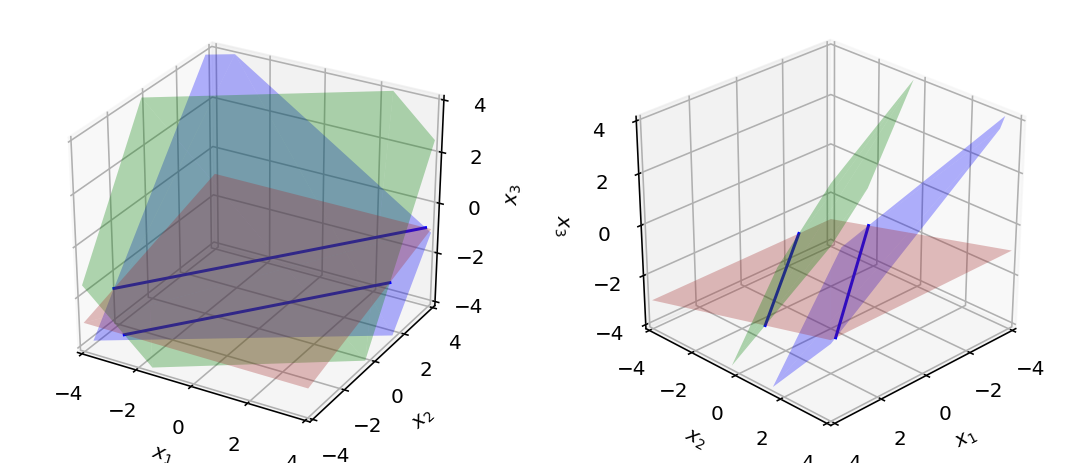

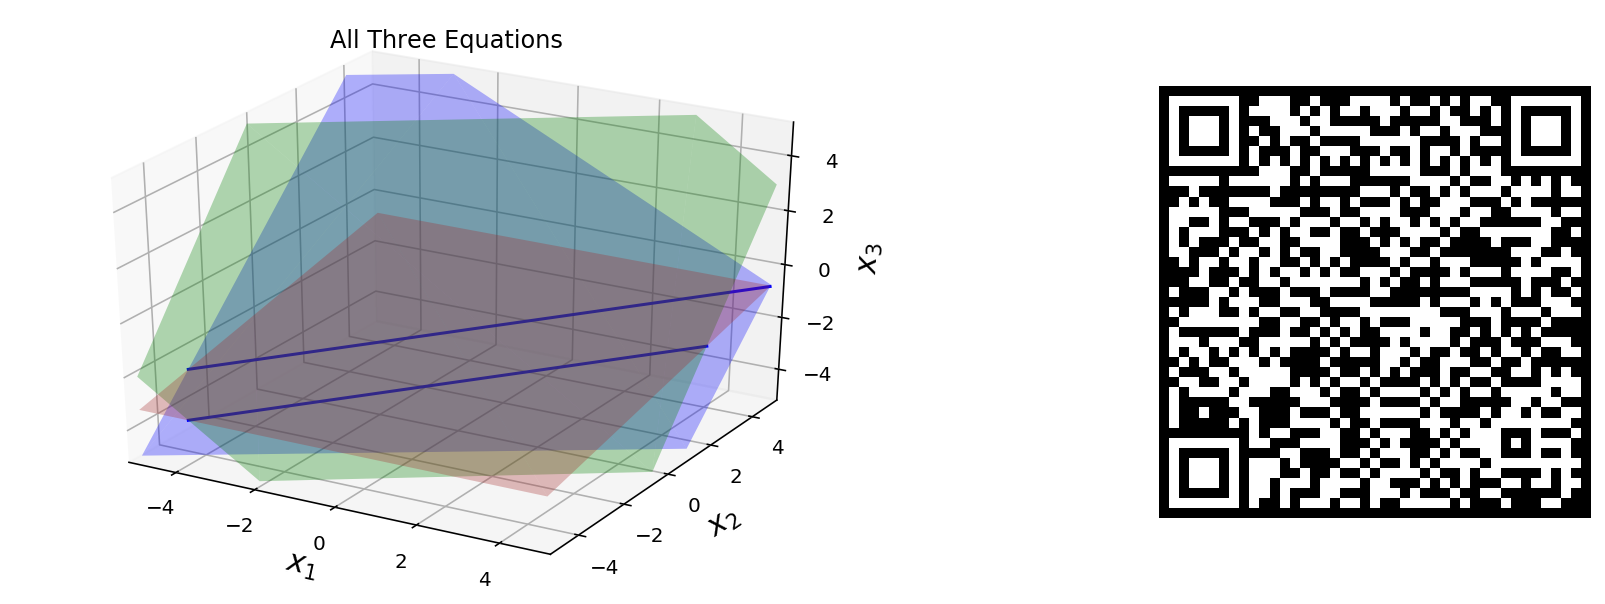

In [159]:
fig = plt.figure()
xmin = ymin = zmin = -4
xmax = ymax = zmax = 4
axs=[1,2]
axs[0] = fig.add_subplot(131, projection='3d')
axs[1] = fig.add_subplot(132, projection='3d')
for ax in axs:
    ax.axes.set_xlim([xmin, xmax])
    ax.axes.set_ylim([ymin, ymax])
    ax.axes.set_zlim([zmin, zmax])
    ax.axes.set_xlabel('$x_1$')
    ax.axes.set_ylabel('$x_2$')
    ax.axes.set_zlabel('$x_3$')
ax = axs[0]
eq1 = [0,1,-4,8]
eq2 = [2,-3,2,1]
eq3 = [5,-8,7,-20]
ut.plotLinEqn3d(ax, eq1, 'Brown')
ut.plotLinEqn3d(ax, eq2, 'Green')
ut.plotLinEqn3d(ax, eq3, 'Blue')
ut.plotIntersection3d(ax, eq1, eq2, 'Green')
#ut.plotIntersection3d(ax, eq2, eq3, 'Green')
ut.plotIntersection3d(ax, eq1, eq3, 'Blue')
ax = axs[1]
ut.plotLinEqn3d(ax, eq1, 'Brown')
ut.plotLinEqn3d(ax, eq2, 'Green')
ut.plotLinEqn3d(ax, eq3, 'Blue')
ut.plotIntersection3d(ax, eq1, eq2, 'Green')
#ut.plotIntersection3d(ax, eq2, eq3, 'Green')
ut.plotIntersection3d(ax, eq1, eq3, 'Blue')
ax.view_init(azim=45)
#
plt.subplots_adjust(right = 2.0)
#
sl.hide_code_in_slideshow()
fig = ut.three_d_figure('Figure 1.9', fig_desc = 'All Three Equations',
                        xmin = -5, xmax = 5, ymin = -5, ymax = 5, zmin = -5, zmax = 5, qr = qr_setting)
fig.plotLinEqn(eq1, 'Brown')
fig.plotLinEqn(eq2, 'Green')
fig.plotLinEqn(eq3, 'Blue')
fig.plotIntersection(eq1, eq2, color='Blue')
fig.plotIntersection(eq1, eq3, color='Blue')
fig.ax.set_title('All Three Equations')
fig.save('Fig01.9')

These plots illustrate that the two intersection lines are parallel.  So there is _no point that lies in all the hyperplanes_.  That is the geometric interpretation of inconsistency.

## Summary

Our entry into linear algebra has been through the solution of systems of linear equations.

* We used a tabular representation called a matrix to represent the linear system
* The solution method uses matrix row reductions: exchanging rows, scaling rows, or adding rows.
* The solution method has two stages: elimination and backsubstitution.

We observed some basic properties of linear systems:

* They can be consistent or inconsistent.   
* If consistent, they can have a single solution or an infinite number of solutions.

We thought geometrically about linear systems and their solutions:

* A linear equation defines a hyperplane
* In a consistent system, all hyperplanes intersect in one or more points
* In an inconsistent system, all hyperplanes do not intersect in any single point
* The solution method we used creates hyperplanes that intersect in the same point set as the original hyperplanes